# 椭圆方程有限差分求解编程示例

* 利用 SymPy 中 `diff`、 `sympify` 和 `lambdify` 函数编写更通用的 PDE 方程模型
* 演示数值计算编程的最佳实践原则和流程

## 一、 一维有限差分

利用有限差分基于 FEALPy 求解
$$\begin{cases}
-u''(x) + 2u(x) = f(x), \\
u(-1)=0, u(1) = 0,
\end{cases}$$
其真解为
$$ u(x) = e^{-x^2}(1 - x^2)$$

$$f(x) = 2 \cdot \left(1 - x^{2}\right) e^{- x^{2}} - 2 \cdot \left(4 x^{2} - \left(x^{2} - 1\right) \left(2 x^{2} - 1\right) - 1\right) e^{- x^{2}}$$

首先，我们演示 SymPy 中 `diff`、 `sympify` 和 `lambdify` 函数的用法及如何获取帮助：

In [2]:
from sympy import *

接着，我们演示如何用上面的三个函数编写更通用的 PDE 数据模型类：

In [1]:
from sympy import * 
import numpy as np

class PdeData:
    def __init__(self, u:str,  x:str, domain=[0, 1]):
        pass

[-1, 1]
1.0


[[4.04657126 4.01152041 4.00287256 4.00071767]
 [4.04006708 4.0100071  4.00250088 4.00062516]
 [3.98613667 3.99670725 3.99918694 3.99979736]]


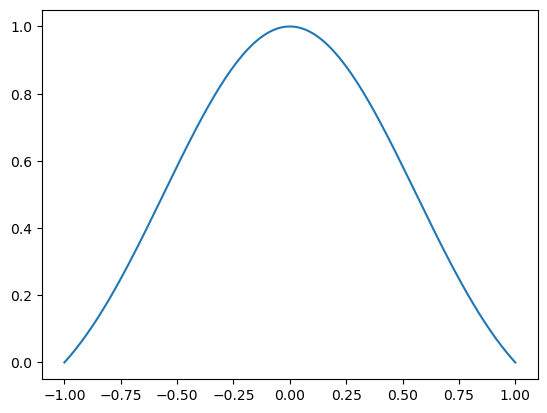

In [55]:
import  matplotlib.pyplot  as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from fealpy.mesh import UniformMesh1d

pde = PdeData('exp(-x**2)*(1 - x**2)', 'x', domain=[-1, 1])
domain = pde.domain()

nx = 10
hx = (domain[1] - domain[0])/nx
mesh = UniformMesh1d((0, nx), h=hx, origin=domain[0])

maxit = 5
e = np.zeros((3, maxit), dtype=np.float64)
h = np.zeros((maxit, ), dtype=np.float64)
dof = np.zeros((maxit, ), dtype=np.int32)
for i in range(maxit):
    NN = mesh.number_of_nodes()
    dof[i] = NN
    h[i] = mesh.h
    A = mesh.laplace_operator() + diags([2], [0], shape=(NN, NN), format='csr')
    f = mesh.interpolate(pde.source, 'node')
    uh = mesh.function() # (NN, )
    A, f = mesh.apply_dirichlet_bc(pde.dirichlet, A, f, uh=uh)
    uh.flat[:] = spsolve(A, f)
    e[0, i], e[1, i], e[2, i] = mesh.error(pde.solution, uh)
    if i < maxit-1:
        mesh.uniform_refine()
        
print(e[:, 0:-1]/e[:, 1:])

fig = plt.figure()
axes = fig.gca()
mesh.show_function(axes, uh)
plt.show()